***

### Ejercicio

Probar a realizar la predicción sin el proceso de normalización y desnormalización

In [13]:
import numpy as np
import pandas as pd

# definir los valores de a y b
a = 2
b = 0.5

# generar los valores de x
x = np.linspace(0, 10, 12000)

# calcular los valores de y
y = a * 10 ** (b * x)

# crear un dataframe con los valores de x e y
df = pd.DataFrame({'x': x, 'y': y})

df

,x,y
0,0.000000,2.000000
1,0.000833,2.001920
2,0.001667,2.003842
3,0.002500,2.005765
4,0.003334,2.007691
...,...,...
11995,9.996666,199233.878782
11996,9.997500,199425.133517
11997,9.998333,199616.571848
11998,9.999167,199808.193950


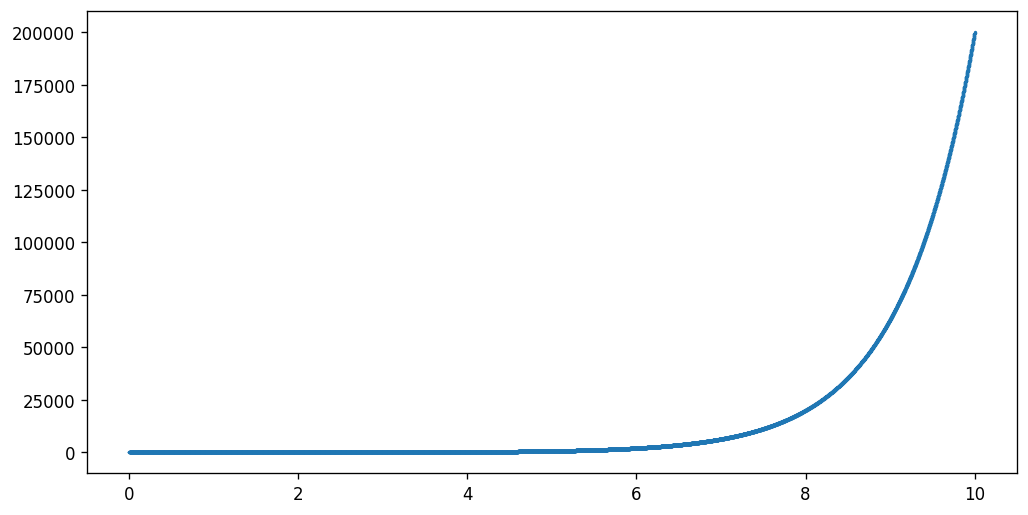

In [14]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10, 5), 'figure.dpi': 120})

plt.scatter(df["x"], df["y"], s = 1)

In [15]:
# Añado ruido en x e y
mu = 0
sigma = 0.1
df["x"] += np.random.normal(mu, sigma, len(df))
df["y"] += df["y"] * np.random.normal(mu + 1, sigma, len(df))

# ordeno por las x's
df = df.sort_values("x")
df.reset_index(drop=True, inplace=True)

# quito los últimos 2000 datos
df = df.iloc[:-2000]
df

,x,y
0,-0.174458,4.415128
1,-0.159864,4.458761
2,-0.144128,4.339062
3,-0.125780,4.178050
4,-0.124277,4.109646
...,...,...
9995,8.329065,62978.166670
9996,8.329764,62936.569845
9997,8.330266,54202.546470
9998,8.330914,56512.698221


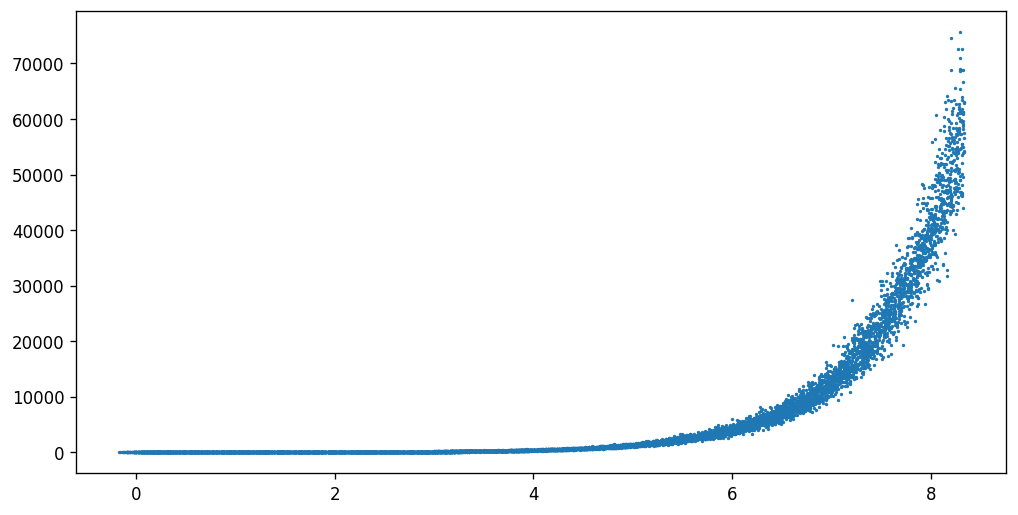

In [16]:
plt.scatter(df["x"], df["y"], s = 1)

***

### Regresión exponencial del dato sin normalizar usando una red neuronal de pyTorch

In [17]:
# Vamos a hacer un split entre train y test
from sklearn.model_selection import train_test_split

dfTrain, dfTest = train_test_split(df, test_size=0.1, shuffle=False)

In [18]:
dfTrain

,x,y
0,-0.174458,4.415128
1,-0.159864,4.458761
2,-0.144128,4.339062
3,-0.125780,4.178050
4,-0.124277,4.109646
...,...,...
8995,7.490102,21198.236006
8996,7.490930,21324.178305
8997,7.491102,24069.496505
8998,7.492333,25848.309508


In [19]:
# pip install torch
# conda install PyTorch -c PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

# Define la arquitectura de la red
# La clase SimpleNet hereda de la clase nn.Module
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()  # Llamada al método __init__ del padre o clase base de la clase actual.
                            # está llamando al método __init__ de la clase nn.Module.
        self.fc = nn.Linear(10, 10) #  Crea una capa de red neuronal lineal, también conocida como una capa fully connected (fc)
                            # y la asigna como un atributo de la clase SimpleNet con el nombre fc.
                            # nn.Linear es una clase de PyTorch que define una capa de red neuronal lineal con una entrada y una salida.
                            # nn.Linear(10, 10) crea una capa con 10 entradas y 10 salidas. 

    def forward(self, x):   # método de la clase SimpleNet que define cómo las entradas son transformadas en las salidas
                            # a través de las capas de la red neuronal. Es un método requerido para todas las subclases
                            # de nn.Module en PyTorch.
                            # x representa la entrada a la red neuronal, y el método debe devolver la salida correspondiente.
                            # forward toma una entrada x y la pasa a través de la capa fully connected self.fc mediante
                            # la línea x = self.fc(x). La salida de esta capa es entonces devuelta como la salida de la red neuronal.
        x = self.fc(x)
        return x

# Instancie la red
model = SimpleNet()

# Defina la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Entrene el modelo
numEpochs = len(dfTrain) # cada epoch admite 10 datos de input
for i in range(0, numEpochs-10):
    # Cada iteración (epoch) cambian los datos de entrada, recorriendo el dataset de training
    inputs = dfTrain.loc[i:i+9]["x"]
    targets = dfTrain.loc[i:i+9]["y"] # a la red neuronal se le alimenta con el dato sin normalizar

    # print("inputs: ", inputs)
    # print(inputs.shape())

    # Convertir dataframes en tensores de tipo float32, que es lo que necesita pyTorch
    inputs = torch.tensor(inputs.to_numpy().copy(), dtype=torch.float32)
    targets = torch.tensor(targets.to_numpy().copy(), dtype=torch.float32)

    # Para afinar más el ajuste del modelo se repiten iteraciones con mismos datos
    for j in range(0, 5):
        # Ajuste el modelo
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
            print(f'Iteración {i, j}, pérdida: {loss.item()}')

Iteración (0, 0), pérdida: 18.275943756103516
Iteración (0, 1), pérdida: 18.19110107421875
Iteración (0, 2), pérdida: 18.106657028198242
Iteración (0, 3), pérdida: 18.022602081298828
Iteración (0, 4), pérdida: 17.93893814086914
Iteración (100, 0), pérdida: 2.731316328048706
Iteración (100, 1), pérdida: 2.7196497917175293
Iteración (100, 2), pérdida: 2.708033323287964
Iteración (100, 3), pérdida: 2.6964666843414307
Iteración (100, 4), pérdida: 2.6849491596221924
Iteración (200, 0), pérdida: 1.143214464187622
Iteración (200, 1), pérdida: 1.1373178958892822
Iteración (200, 2), pérdida: 1.1314513683319092
Iteración (200, 3), pérdida: 1.1256153583526611
Iteración (200, 4), pérdida: 1.1198093891143799
Iteración (300, 0), pérdida: 0.15766361355781555
Iteración (300, 1), pérdida: 0.15666888654232025
Iteración (300, 2), pérdida: 0.1556803286075592
Iteración (300, 3), pérdida: 0.15469802916049957
Iteración (300, 4), pérdida: 0.15372183918952942
Iteración (400, 0), pérdida: 0.3085922300815582
Ite

In [20]:
dfTest

,x,y
9000,7.492377,29209.015689
9001,7.492500,23301.909676
9002,7.493781,21815.910442
9003,7.494390,24120.130886
9004,7.494610,18859.843168
...,...,...
9995,8.329065,62978.166670
9996,8.329764,62936.569845
9997,8.330266,54202.546470
9998,8.330914,56512.698221


In [21]:
# Genero predicción en el dataset del test
dfTest["logForecast"] = 0
for i in dfTest.index:
    if i%10 == 0: # batches of 10 items
        # print("i = ", i)
        inputTest = dfTest.loc[i:i+9]["x"]
        # print("inputTest:", inputTest)

        # Convertir dataframes en tensores de tipo float32, que es lo que necesita pyTorch
        inputTest = torch.tensor(inputTest.to_numpy().copy(), dtype=torch.float32)
        # print("inputTest:", inputTest)

        outputTest = model(inputTest)
        # print("outputTest:", outputTest)

        dfTest.loc[i:i+9, "forecast"] = outputTest.detach().numpy()

In [22]:
dfTest

,x,y,logForecast,forecast
9000,7.492377,29209.015689,0,21631.902344
9001,7.492500,23301.909676,0,20770.533203
9002,7.493781,21815.910442,0,21513.947266
9003,7.494390,24120.130886,0,23073.744141
9004,7.494610,18859.843168,0,17679.115234
...,...,...,...,...
9995,8.329065,62978.166670,0,34211.445312
9996,8.329764,62936.569845,0,23576.976562
9997,8.330266,54202.546470,0,23717.417969
9998,8.330914,56512.698221,0,26771.117188


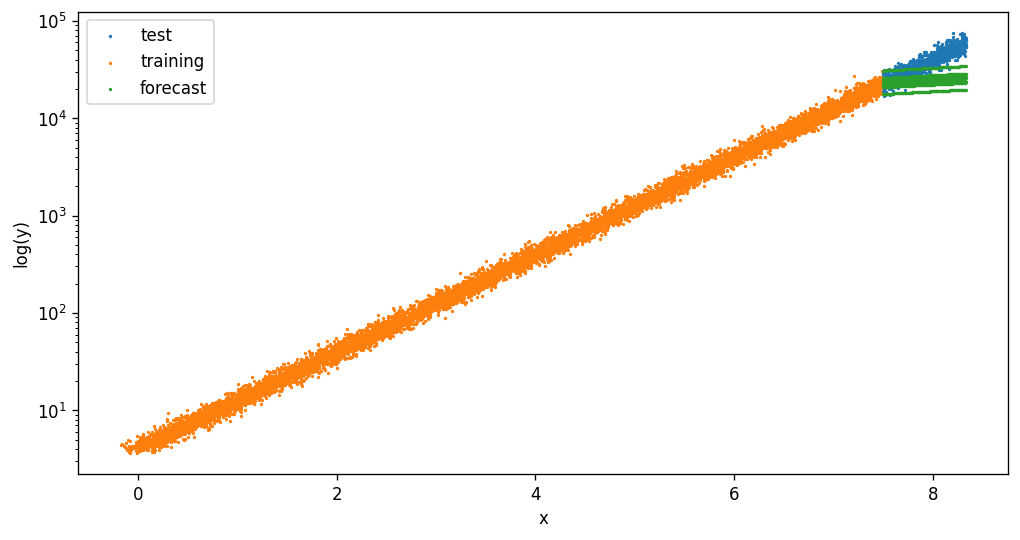

In [23]:
# Gráfica de la predicción en escala logarítmica
fig, ax = plt.subplots()
ax.scatter(dfTest["x"], dfTest["y"], label="test", s=1)
ax.scatter(dfTrain["x"], dfTrain["y"], label="training", s=1)
ax.scatter(dfTest["x"], dfTest["forecast"], label="forecast", s=1)

ax.set_yscale("log")

plt.ylabel("log(y)")
plt.xlabel("x")
plt.legend()
plt.show()

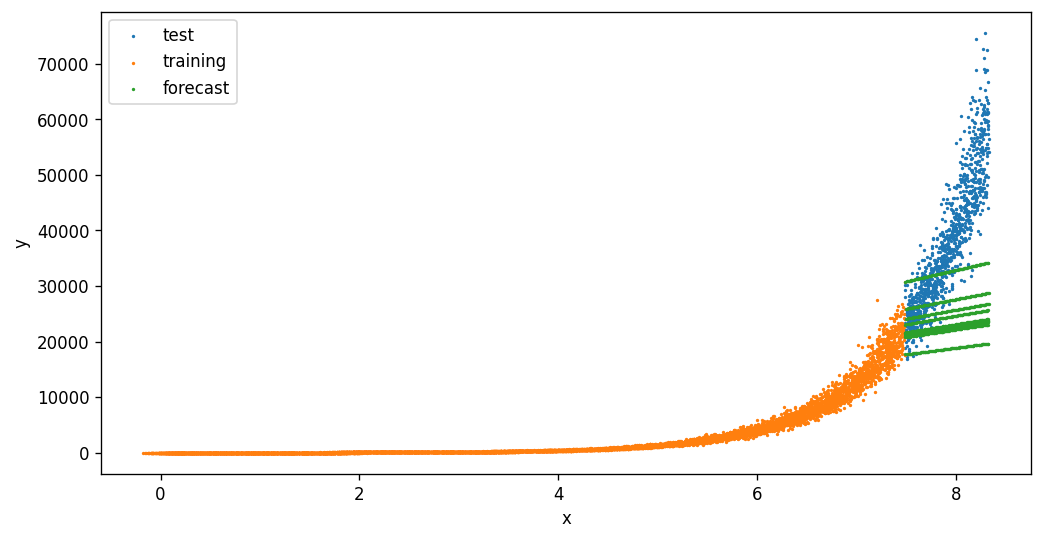

In [24]:
# Gráfica de la predicción en escala lineal
plt.scatter(dfTest["x"], dfTest["y"], label="test", s=1)
plt.scatter(dfTrain["x"], dfTrain["y"], label="training", s=1)
plt.scatter(dfTest["x"], dfTest["forecast"], label="forecast", s=1)

plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.show()

***

## Conclusiones

1. Bajo el criterio de RMSE la red neuronal realiza bastante bien la regresión sin normalizar los datos en la escala logarítmica.

2. Sin embargo, la tendencia de las franjas de predicción no son exponenciales sino lineales. Por tanto en un test de mayor amplitud, la predicción perderá calidad.

3. Si hubieramos aplicado normalización logarítmica, la regresión de la red neuronal sería mucho más precisa y acertada.